In [2]:
import torch

# Check if GPU is available
gpu_available = torch.cuda.is_available()
print(f"GPU Available: {gpu_available}")

GPU Available: True


In [3]:
import torch

# Kiểm tra phiên bản CUDA
cuda_version = torch.version.cuda
print(f"CUDA Version: {cuda_version}")

CUDA Version: 12.1


In [4]:
# List of libraries
libraries = [
    "numpy",
    "pandas",
    "blobfile",
    "nibabel",
    "opencv-python",
    "scikit-image",
    "matplotlib",
    "batchgenerators",
    "visdom",
    "torchsummary",
    "tensorboard",
    "medpy",
    "monai"
]

# Write to requirements.txt
with open('requirements.txt', 'w') as file:
    for library in libraries:
        file.write(f"{library}\n")
print("DONE!")

DONE!


### Visualize output

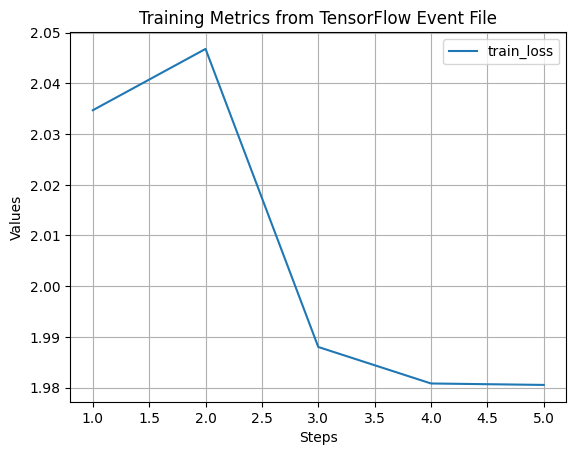

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the file path to the uploaded TensorFlow event file
file_path = 'tensorboards/events.out.tfevents.1727231143.FIV-PC-Hungbv16.146911.0'

# Function to parse TensorFlow event file and extract summaries
def parse_tf_event_file(file_path):
    steps = []
    tags = {}
    
    for event in tf.compat.v1.train.summary_iterator(file_path):
        for value in event.summary.value:
            tag = value.tag
            if hasattr(value, 'simple_value'):
                if tag not in tags:
                    tags[tag] = []
                tags[tag].append((event.step, value.simple_value))
                if event.step not in steps:
                    steps.append(event.step)
    return steps, tags

# Function to plot the metrics
def plot_metrics(steps, tags):
    for tag, values in tags.items():
        step_values = [v[0] for v in values]
        simple_values = [v[1] for v in values]

        plt.plot(step_values, simple_values, label=tag)
    
    plt.xlabel('Steps')
    plt.ylabel('Values')
    plt.title('Training Metrics from TensorFlow Event File')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to load the file and plot the results
def visualize_tf_event_file(file_path):
    steps, tags = parse_tf_event_file(file_path)
    plot_metrics(steps, tags)

# Call the visualization function
visualize_tf_event_file(file_path)
